In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import collections
import seaborn as sns
import pandas as pd

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ksp200004\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksp200004\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ksp200004\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
data = open('data.txt', encoding="utf8").read()

lot :  28
people :  23
twitter :  23
we're :  23
really :  17
see :  15
us :  14
what's :  14
growth :  13
also :  13
world :  12
around :  12
happening :  11
focus :  11
sure :  11
use :  10
making :  10
that's :  10
time :  10
get :  10
make :  10
live :  10
one :  9
faster :  9
2016 :  8
going :  8
team :  8
new :  8
easier :  8
we've :  8


<AxesSubplot:xlabel='Word', ylabel='Count'>

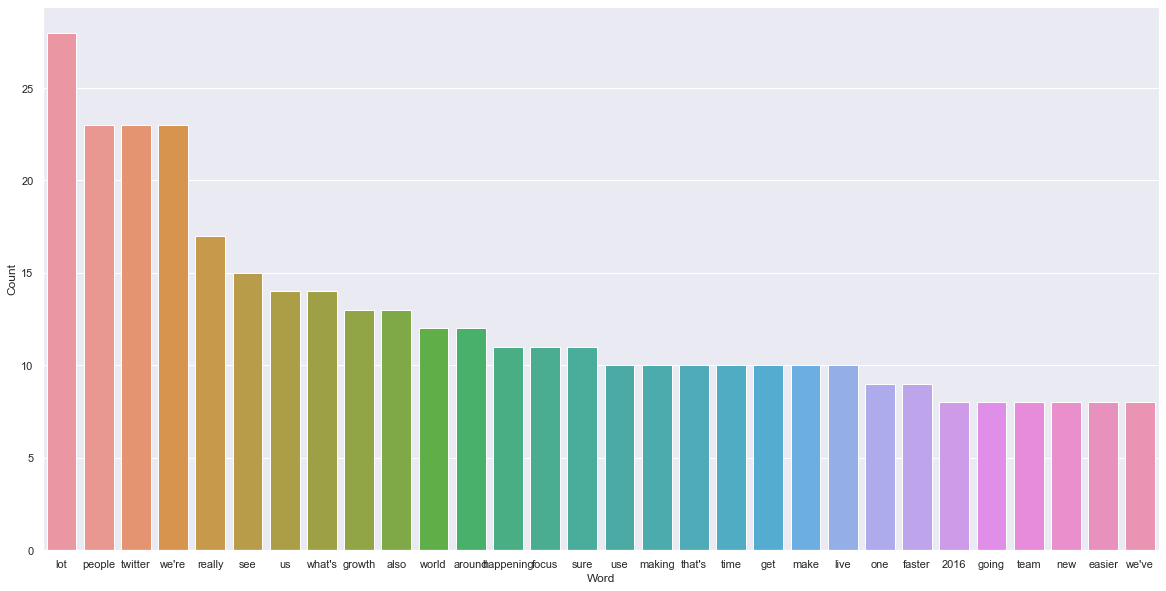

In [3]:
countdict = {}
for i in data.lower().split():
    i = i.replace(".","")
    i = i.replace(",","")
    i = i.replace(":","")
    i = i.replace("\"","")
    i = i.replace("!","")
    i = i.replace("/","")
    i = i.replace("+","")
    i = i.replace("-","")
    i = i.replace("*","")
    if i not in stopwords.words("english"):
        if i not in countdict:
            countdict[i] = 1
        else:
            countdict[i] += 1
n = 30
worditer = collections.Counter(countdict)
for word, count in worditer.most_common(n):
    print(word, ": ", count)
lst = worditer.most_common(n)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
sns.set(rc = {'figure.figsize':(20,10)})
sns.barplot(x="Word", y="Count", data=df)

In [4]:
data = data.lower()

final_words = []
tokenize_data = word_tokenize(data, "english")

for data in tokenize_data:
    if data not in stopwords.words("english"):
        final_words.append(data)
    
print(final_words)

['good', 'morning', 'everyone', 'thanks', 'joining', 'us', 'want', 'start', 'call', 'today', 'looking', 'back', '2016', 'transformative', 'year', 'us', 'transformations', 'difficult', ',', 'one', 'especially', 'challenging', 'started', '2016', 'resetting', 'focusing', 'people', 'use', 'twitter', "'s", 'fastest', 'way', 'see', "'s", 'happening', ',', 'everyone', 'talking', 'reset', 'refocused', 'strengths', ',', 'achieved', 'one', 'hardest', 'things', 'consumer', 'services', 'scale', 'reversed', 'reaccelerated', 'usage', "'re", 'thrilled', 'report', 'daily', 'active', 'usage', 'accelerated', 'third', 'quarter', 'row', ',', 'see', 'strong', 'growth', 'continuing', 'making', 'experience', 'little', 'better', 'every', 'single', 'day', 'may', 'felt', 'like', "n't", 'changing', 'much', 'past', 'year', ',', 'hundreds', 'little', 'changes', 'added', 'predictable', 'sustained', 'growth', 'use', 'foundation', 'inventive', 'take', 'bigger', 'risks', "'s", 'exactly', 'going', 'said', 'last', 'call

In [5]:
final_data  = ' '.join(final_words)
final_data = final_data.replace(',', '')
final_data

"good morning everyone thanks joining us want start call today looking back 2016 transformative year us transformations difficult  one especially challenging started 2016 resetting focusing people use twitter 's fastest way see 's happening  everyone talking reset refocused strengths  achieved one hardest things consumer services scale reversed reaccelerated usage 're thrilled report daily active usage accelerated third quarter row  see strong growth continuing making experience little better every single day may felt like n't changing much past year  hundreds little changes added predictable sustained growth use foundation inventive take bigger risks 's exactly going said last call revenue growth lag usage see numbers outlook  proven case advertisers need approach apply consumer service  reset focus strengths means clearly differentiating complementing twitter 's real-time nature  proving advertisers twitter easy works customers 2016 challenge reaccelerating consumer usage  gives us c

In [6]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [7]:
score = sentiment_analyzer.polarity_scores(final_data)
print(score)
negative = score['neg']
positive = score['pos']
neutral = score['neu']
print('')
if negative > positive and negative > neutral:
    print('The Speech was Negative!')
elif positive > negative and positive > neutral:
    print('The Speech was Positive!')
else:
    print('The Speech was Neutral!')

{'neg': 0.02, 'neu': 0.734, 'pos': 0.246, 'compound': 0.9999}

The Speech was Neutral!
